<a href="https://colab.research.google.com/github/7Chethan007/ML-Lab---UE22EC352B/blob/main/Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expt-4
Aim: Generate a Confusion Matrix and compute true positive, true negative, false positive, and false negative.
Program to generate confusion Matrix and classification report

Confusion matrix : 
 [[3 3]
 [1 4]]
Accuracy =  0.6363636363636364
Classification Report 

              precision    recall  f1-score   support

           1       0.75      0.50      0.60         6
           0       0.57      0.80      0.67         5

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11

fpr =  [0.  0.2 1. ]
tpr =  [0.  0.5 1. ]


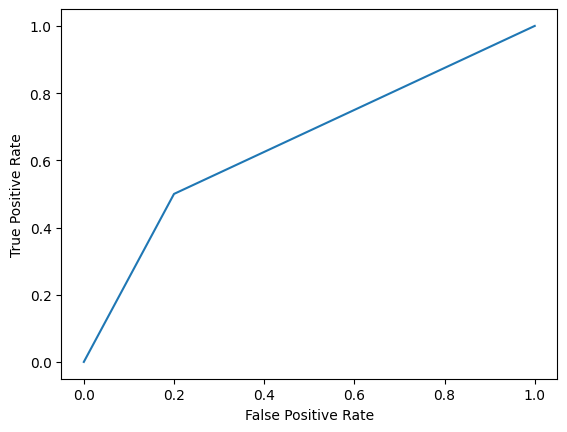

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# actual values
#A=1= Positive Class , B=0=Negative Class
actual = [1,0,0,1,0,1,1,1,0,1,0]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0,1]
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)
acc=accuracy_score(actual,predicted)
print('Accuracy = ',acc)
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification Report \n')
print(matrix)
fpr, tpr , _= metrics.roc_curve(actual, predicted) #create ROC curve
print('fpr = ',fpr)
print('tpr = ',tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Assignment:
    1) Verify theoretically the entries of the classification report.

    2) Experiment with the following actual and predicted samples and verify the entries of the classification report.
actual values
#A=1=Positive Class , B=0=Negative Class
   actual = [1,0,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1]
   # predicted values
   predicted = [1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0]



===== Test Case 1 =====
Confusion Matrix:
 [[3 3]
 [1 4]]

--- Manual Metrics Calculation ---
True Positives: 3
False Positives: 1
True Negatives: 4
False Negatives: 3
Precision: 0.7500
Recall: 0.5000
F1-Score: 0.6000
Accuracy: 0.6364

--- Sklearn Classification Report ---
              precision    recall  f1-score   support

           1       0.75      0.50      0.60         6
           0       0.57      0.80      0.67         5

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



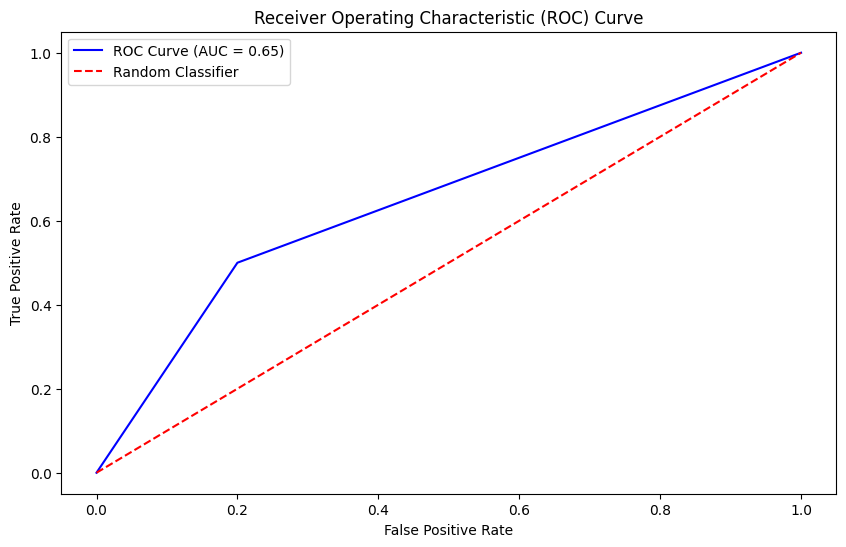


AUC Score: 0.6500

===== Test Case 2 =====
Confusion Matrix:
 [[3 8]
 [2 5]]

--- Manual Metrics Calculation ---
True Positives: 3
False Positives: 2
True Negatives: 5
False Negatives: 8
Precision: 0.6000
Recall: 0.2727
F1-Score: 0.3750
Accuracy: 0.4444

--- Sklearn Classification Report ---
              precision    recall  f1-score   support

           1       0.60      0.27      0.38        11
           0       0.38      0.71      0.50         7

    accuracy                           0.44        18
   macro avg       0.49      0.49      0.44        18
weighted avg       0.52      0.44      0.42        18



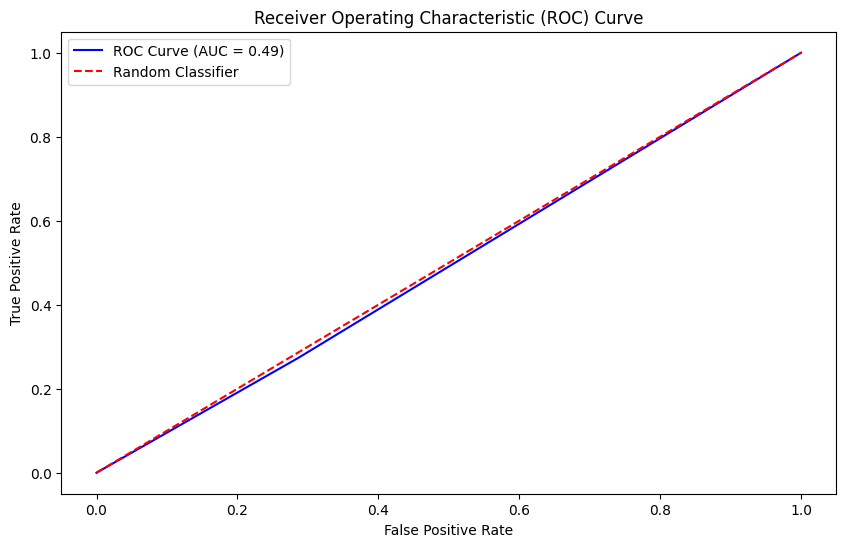


AUC Score: 0.4935


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

def comprehensive_classification_analysis(actual, predicted):
    """
    Perform comprehensive classification metrics analysis

    Parameters:
    - actual: True labels
    - predicted: Predicted labels
    """

    # 1. Confusion Matrix
    cm = confusion_matrix(actual, predicted, labels=[1,0])
    print("Confusion Matrix:\n", cm)

    # Extract Confusion Matrix Components
    TP = cm[0][0]  # True Positives
    FN = cm[0][1]  # False Negatives
    FP = cm[1][0]  # False Positives
    TN = cm[1][1]  # True Negatives

    # 2. Manual Metrics Calculation
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    print("\n--- Manual Metrics Calculation ---")
    print(f"True Positives: {TP}")
    print(f"False Positives: {FP}")
    print(f"True Negatives: {TN}")
    print(f"False Negatives: {FN}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # 3. Sklearn Classification Report
    print("\n--- Sklearn Classification Report ---")
    print(classification_report(actual, predicted, labels=[1,0]))

    # 4. ROC Curve Analysis
    try:
        fpr, tpr, thresholds = roc_curve(actual, predicted)
        auc = roc_auc_score(actual, predicted)

        plt.figure(figsize=(10,6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        print(f"\nAUC Score: {auc:.4f}")
    except Exception as e:
        print(f"ROC Curve generation error: {e}")

# Test Case 1
print("\n===== Test Case 1 =====")
actual1 = [1,0,0,1,0,1,1,1,0,1,0]
predicted1 = [1,0,0,1,0,0,0,1,0,0,1]
comprehensive_classification_analysis(actual1, predicted1)

# Test Case 2
print("\n===== Test Case 2 =====")
actual2 = [1,0,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1]
predicted2 = [1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0]
comprehensive_classification_analysis(actual2, predicted2)
